<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Artificial%20Neural%20Network/artificial_neural_network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network


https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca


In [0]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

## 1. Boston Dataset

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [0]:
X = boston.data
y = boston.target

sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(boston.data.shape)
print(boston.target.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(506, 13)
(506,)
(404, 13) (404,)
(102, 13) (102,)


## 2. Build Artificial Neural Network

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [7]:
history = model.fit(
                      X_train,
                      y_train,
                      epochs=50,
                      shuffle=True,
                      verbose=2,
                      validation_data=(X_test, y_test)
                  )

Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/50
 - 0s - loss: 576.2821 - val_loss: 534.7604
Epoch 2/50
 - 0s - loss: 531.3712 - val_loss: 492.5019
Epoch 3/50
 - 0s - loss: 478.9938 - val_loss: 438.2819
Epoch 4/50
 - 0s - loss: 411.7567 - val_loss: 365.7390
Epoch 5/50
 - 0s - loss: 322.5296 - val_loss: 277.3557
Epoch 6/50
 - 0s - loss: 219.4889 - val_loss: 190.1060
Epoch 7/50
 - 0s - loss: 133.1329 - val_loss: 126.8385
Epoch 8/50
 - 0s - loss: 83.2908 - val_loss: 94.9982
Epoch 9/50
 - 0s - loss: 60.1746 - val_loss: 77.1405
Epoch 10/50
 - 0s - loss: 46.6959 - val_loss: 63.9389
Epoch 11/50
 - 0s - loss: 36.2987 - val_loss: 56.1866
Epoch 12/50
 - 0s - loss: 29.6918 - val_loss: 50.9968
Epoch 13/50
 - 0s - loss: 25.3586 - val_loss: 47.4521
Epoch 14/50
 - 0s - loss: 22.6530 - val_loss: 44.5885
Epoch 15/50
 - 0s - loss: 20.8133 - val_loss: 42.8020
Epoch 16/50
 - 0s - loss: 19.3689 - val_loss: 40.3185
Epoch 17/50
 - 0s - loss: 18.3213 - v

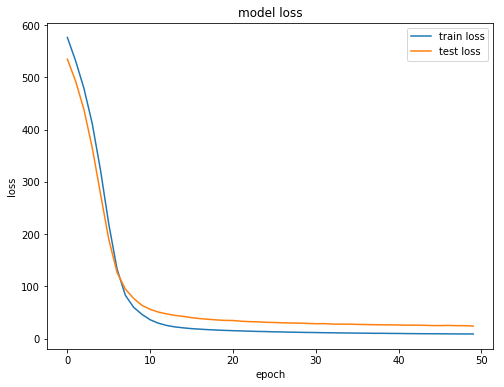

In [17]:
plt.figure(1, figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [0]:
predictions = model.predict(X_test)

In [10]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

102/102 [==============================] - 0s 61us/step
24.38766788968853


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

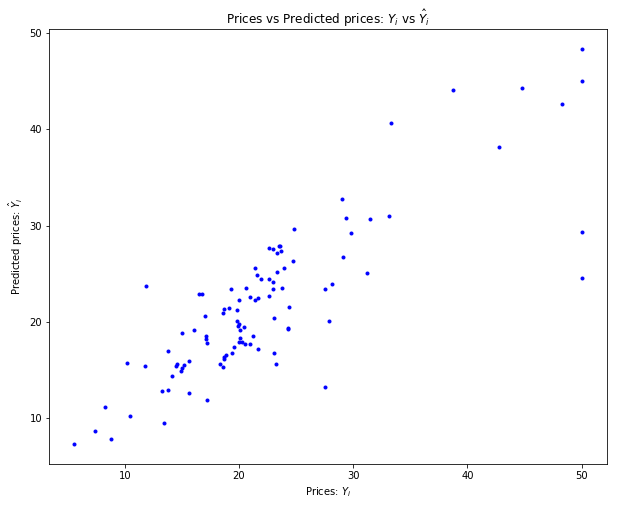

In [29]:
plt.figure(1, figsize=(10,8))
plt.scatter(y_test, predictions, marker='.', c="b")
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")